# Name : Mayuri Mahesh Gade
## Assignment No.8
## Clustering

In [127]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [129]:
data=pd.read_csv(r"F:\download folder\EastWestAirlines.csv")
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [146]:
data.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
Cluster              0
dtype: int64

In [131]:
features = data.drop(columns=['ID#', 'Award?'])

In [133]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [135]:
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

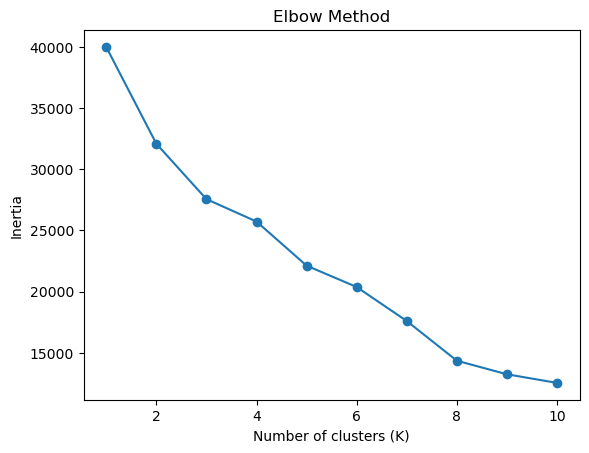

In [92]:
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [95]:
optimal_k = 3  # Set this to the K value you determine is optimal
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

In [97]:
print(data.head()) 

   ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  \
0            1                  0                0               7000       0   
1            2                  0                0               6968       0   
2            4                  0                0               7034       0   
3            1                  0                0               6952       0   
4           26               2077                4               6935       1   

   Cluster  
0        0  
1        0  
2        0 

In [99]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
silhouette_avg = silhouette_score(scaled_features, data['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')


Silhouette Score: 0.33170243934542987


In [100]:
cluster_counts = data['Cluster'].value_counts()
print(cluster_counts)


Cluster
0    2519
1    1321
2     159
Name: count, dtype: int64


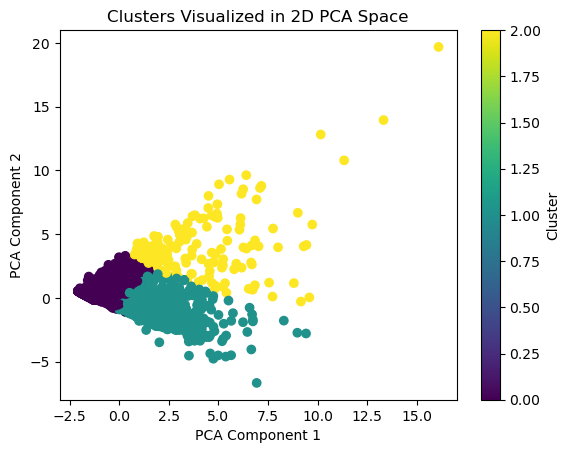

In [101]:
from sklearn.decomposition import PCA

# Reduce to 2 dimensions
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

# Plotting
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=data['Cluster'], cmap='viridis')
plt.title('Clusters Visualized in 2D PCA Space')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


In [108]:
eps = 0.5  # Example value
min_samples = 5  # Example value


In [110]:
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
data['Cluster'] = dbscan.fit_predict(scaled_features)

In [113]:
if len(set(data['Cluster'])) > 1:  # Ensure there's more than one cluster
    silhouette_avg = silhouette_score(scaled_features, data['Cluster'])
    print(f'Silhouette Score: {silhouette_avg}')
else:
    print("Silhouette score cannot be computed; only one cluster detected.")


Silhouette Score: -0.07406726457859084


In [114]:
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)


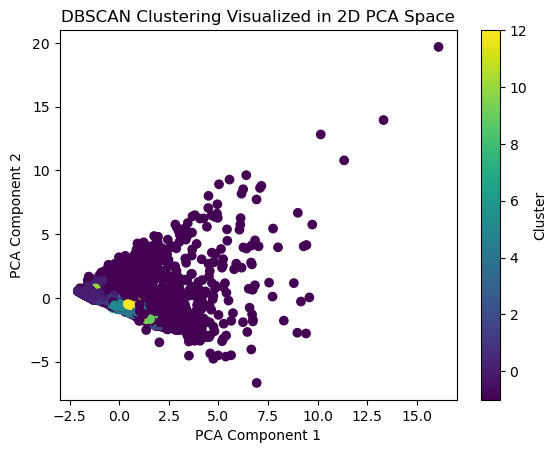

In [116]:
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=data['Cluster'], cmap='viridis', marker='o')
plt.title('DBSCAN Clustering Visualized in 2D PCA Space')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [137]:
n_clusters = 3
hierarchical_model = AgglomerativeClustering(n_clusters=n_clusters)
data['Cluster'] = hierarchical_model.fit_predict(scaled_features)


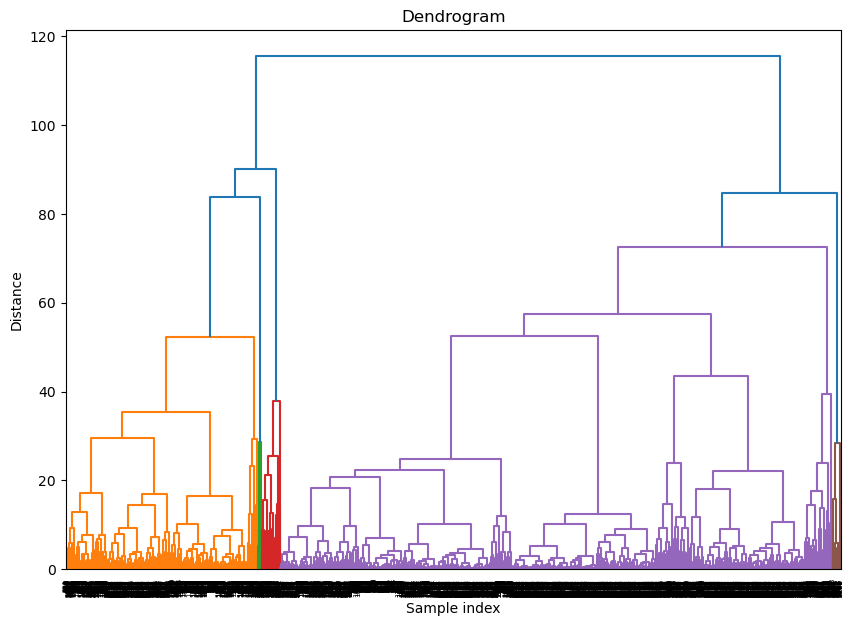

In [138]:
plt.figure(figsize=(10, 7))
linked = linkage(scaled_features, 'ward')  # 'ward' is one of the methods
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

In [142]:
if len(set(data['Cluster'])) > 1:
    silhouette_avg = silhouette_score(scaled_features, data['Cluster'])
    print(f'Silhouette Score: {silhouette_avg}')
else:
    print("Silhouette score cannot be computed; only one cluster detected.")


Silhouette Score: 0.31619409882758315


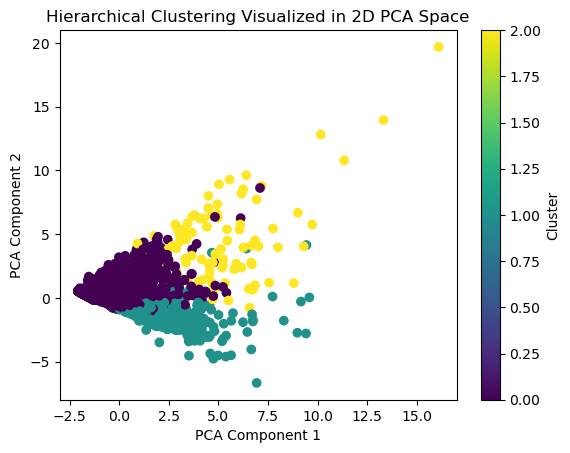

In [144]:
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=data['Cluster'], cmap='viridis', marker='o')
plt.title('Hierarchical Clustering Visualized in 2D PCA Space')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()